<a href="https://colab.research.google.com/github/ZerxekLP/BioInformatikColab/blob/main/Kopie_von_4_03_DeBruijn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Build a DeBruijn Graph

Write a function "de_bruijn_ize" which gets a string and a kmer length k and returns the nodes and edges of the corresponding DeBruijn graph.

Remember how to build the DeBruijn Graph:

  1. For each kmer, build the left and right (k-1)mer. These are the two starting nodes of the graph.
  2. Insert an edge between these two nodes.
  3. Repeat for all remaining kmers.

In [1]:
def de_bruijn_ize(st, k):
    """ Return a list holding, for each k-mer, its left
        k-1-mer and its right k-1-mer in a pair """
    edges = []
    nodes = set()

    for i in range(len(st) - k + 1):
        kmer = st[i:i + k]
        left = kmer[:-1]
        right = kmer[1:]
        edges.append((left, right))
        nodes.update([left, right])

    return nodes, edges


In [2]:
nodes, edges = de_bruijn_ize("ACGCGTCG", 3)

In [3]:
nodes

{'AC', 'CG', 'GC', 'GT', 'TC'}

In [4]:
edges

[('AC', 'CG'),
 ('CG', 'GC'),
 ('GC', 'CG'),
 ('CG', 'GT'),
 ('GT', 'TC'),
 ('TC', 'CG')]

In [5]:
from graphviz import Digraph

def visualize_de_bruijn(st, k):
    """Visualize a directed multigraph using graphviz."""
    nodes, edges = de_bruijn_ize(st, k)
    dot = Digraph(format='png')  # Erstelle eine Digraph-Instanz für gerichtete Graphen
    for node in nodes:
        dot.node(node, label=node)  # Füge die Knoten hinzu
    for src, dst in edges:
        dot.edge(src, dst)  # Füge die Kanten hinzu
    return dot

In [6]:
# might have to install gvmagic this first:
!pip install graphviz

In [7]:
%load_ext graphviz

The graphviz module is not an IPython extension.


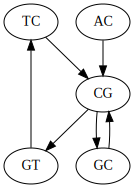

In [8]:
visualize_de_bruijn("ACGCGTCG", 3)